In [1]:
# import matplotlib as mpl
# matplotlib.style.use('fast')
# matplotlib.use('agg')
import logging
logging.basicConfig(level=logging.INFO)
%time import shnitsel.dynamic.datasheet as D

INFO:rdkit:Enabling RDKit 2024.03.6 jupyter extensions


CPU times: user 6.94 s, sys: 718 ms, total: 7.66 s
Wall time: 7.22 s


In [2]:
sheet = D.Datasheet(path='/nc/Theo_SHNITSEL/filtered/traj_C2H4_noS2.nc', spectra_times=[0, 10, 20, 30])

In [3]:
%time sheet.calc_all()

INFO:root:cached per_state in 1.8621432660147548 s
INFO:root:cached inter_state in 1.6262400390114635 s
INFO:root:cached pops in 7.425101939006709 s
INFO:root:cached delta_E in 11.279705318040214 s
INFO:root:cached fosc_time in 11.568479306995869 s


TypeError: 'Dataset' object is not callable

INFO:root:finished plot_per_state_histograms in 3.894118355005048 s


CPU times: user 3.65 s, sys: 33.2 ms, total: 3.69 s
Wall time: 3.9 s


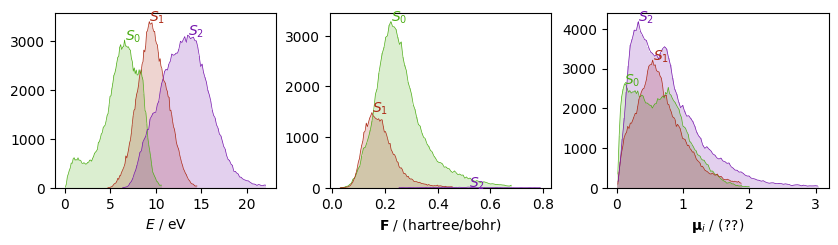

In [4]:
%time sheet.plot_per_state_histograms()

INFO:root:finished plot_timeplots in 0.3774030989734456 s


CPU times: user 373 ms, sys: 5.75 ms, total: 379 ms
Wall time: 381 ms


{'pop': <Axes: label='pop', ylabel='Population'>,
 'de': <Axes: label='de', ylabel='$\\Delta E$'>,
 'ft': <Axes: label='ft', xlabel='$t$ / fs', ylabel='$f_\\mathrm{osc}$'>}

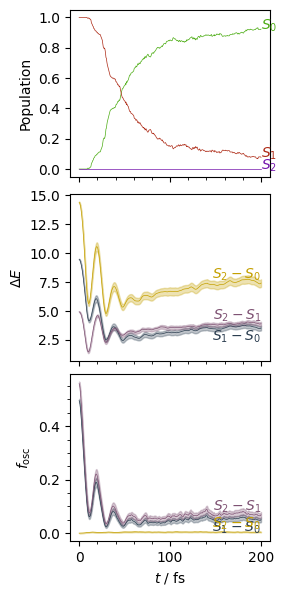

In [5]:
%time sheet.plot_timeplots()

In [6]:
%time sheet.plot_separated_spectra_and_hists()

TypeError: 'Dataset' object is not callable

INFO:root:finished plot_timeplots in 0.30877535592298955 s


TypeError: 'Dataset' object is not callable

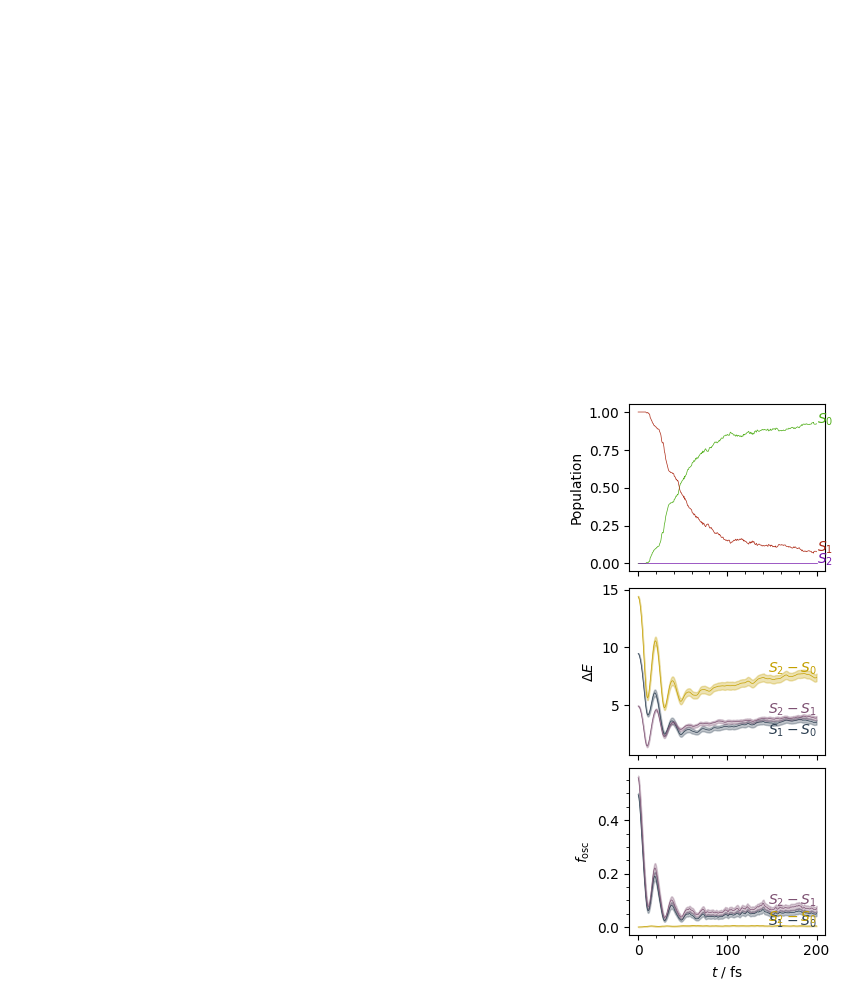

In [7]:
%time fig = sheet.plot()

In [7]:
fig.savefig('/tmp/ethene.png')

## Alkene datasheets

INFO:root:cached pops in 3.434587102034129 s
INFO:root:cached inter_state in 0.9642544239759445 s
INFO:root:cached delta_E in 8.498546592076309 s
INFO:root:cached fosc_time in 7.582894721068442 s
INFO:root:finished plot_timeplots in 19.769129666034132 s
INFO:root:cached spectra in 0.35751767398323864 s
INFO:root:cached spectra_groups in 0.3608184449840337 s
INFO:root:finished plot_separated_spectra_and_hists in 2.8937223199754953 s
INFO:root:cached noodle in 1.9269426219398156 s
INFO:root:finished plot_nacs_histograms in 3.4151971540413797 s
INFO:root:finished plot_noodle in 1.8294691880000755 s
INFO:root:finished plot_structure in 0.10283111198805273 s


C/C=C\C InChI=1S/C4H8/c1-3-4-2/h3-4H,1-2H3/b4-3-


INFO:root:cached pops in 6.290940494975075 s
INFO:root:cached inter_state in 2.066570688970387 s
INFO:root:cached delta_E in 12.568875414901413 s
INFO:root:cached fosc_time in 10.431452385964803 s
INFO:root:finished plot_timeplots in 29.551713807042688 s
INFO:root:cached spectra in 0.5754357239929959 s
INFO:root:cached spectra_groups in 0.5791009400272742 s
INFO:root:finished plot_separated_spectra_and_hists in 3.374484372907318 s
INFO:root:cached noodle in 3.206860281061381 s
INFO:root:finished plot_nacs_histograms in 4.713633527979255 s
INFO:root:finished plot_noodle in 10.449657865916379 s
INFO:root:finished plot_structure in 0.08609657199122012 s


C=C InChI=1S/C2H4/c1-2/h1-2H2


INFO:root:cached pops in 7.3858927430119365 s
INFO:root:cached inter_state in 2.0069138390244916 s
INFO:root:cached delta_E in 13.20409404009115 s
INFO:root:cached fosc_time in 11.512585710035637 s
INFO:root:finished plot_timeplots in 32.354824337991886 s
INFO:root:cached spectra in 0.6938125090673566 s
INFO:root:cached spectra_groups in 0.6971744890324771 s
INFO:root:finished plot_separated_spectra_and_hists in 3.6933497349964455 s
INFO:root:cached noodle in 8.397334852954373 s
INFO:root:finished plot_nacs_histograms in 9.851578454952687 s
INFO:root:finished plot_noodle in 11.360051690950058 s
[16:19:32] WARNING: not removing hydrogen atom without neighbors
[16:19:32] WARNING: Proton(s) added/removed

INFO:root:finished plot_structure in 0.09098448301665485 s


[H+].[H]/[C-]=C/C InChI=1S/C3H5/c1-3-2/h1,3H,2H3/q-1/p+1


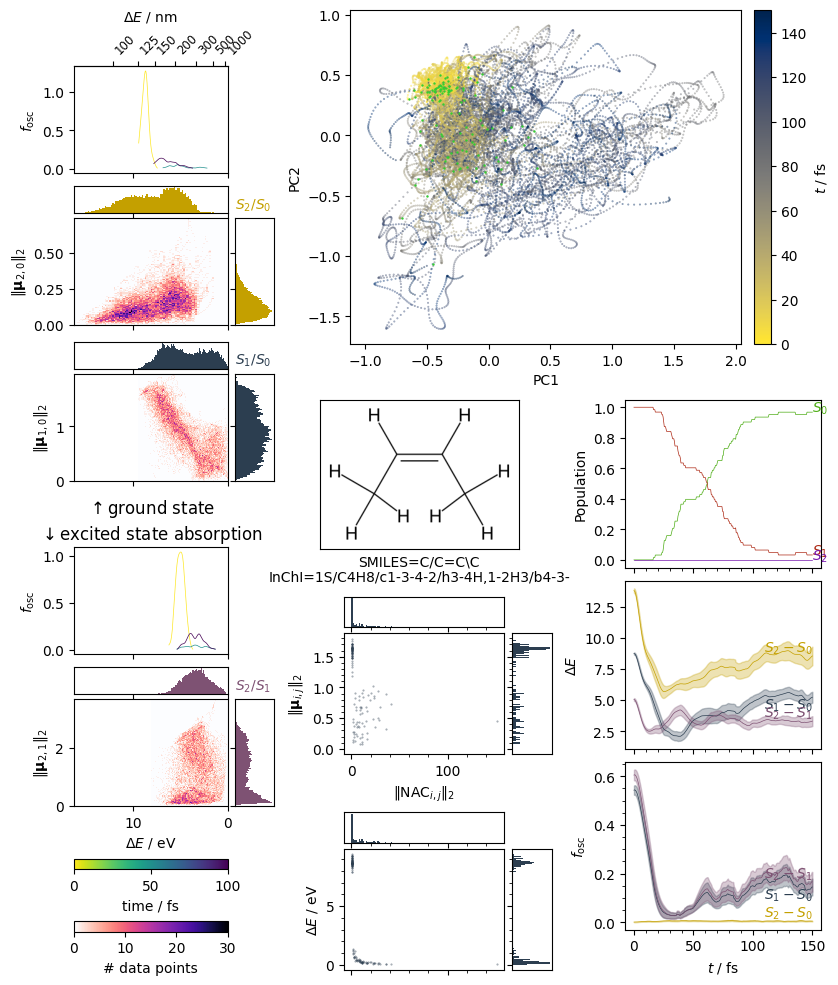

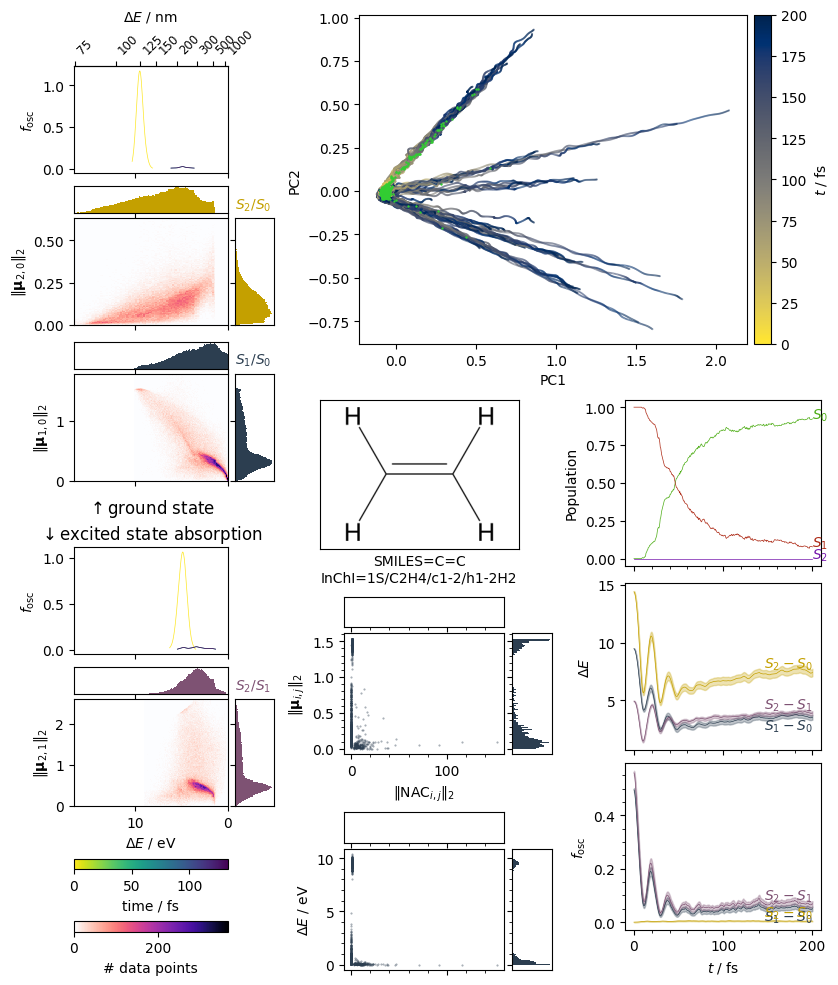

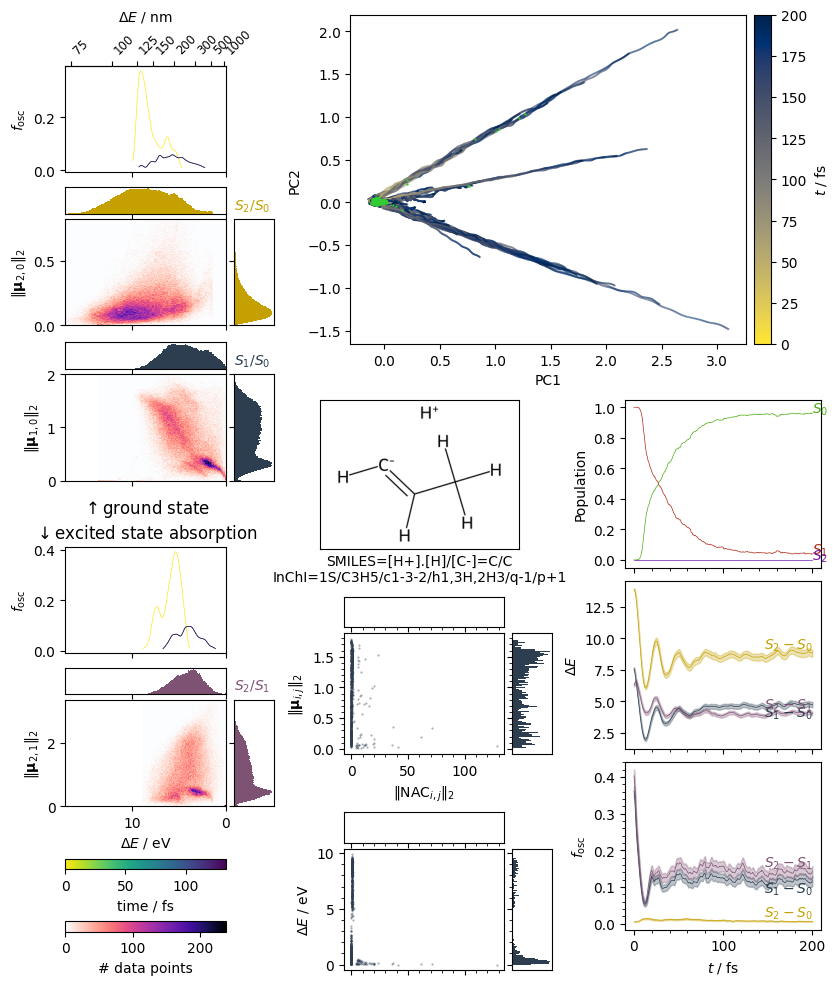

In [3]:
from glob import iglob
for path in iglob('/nc/Theo_SHNITSEL/filtered/*.nc'):
    sheet = D.Datasheet(path=path)
    sheet.plot()

## Apply forcefield (required for propene)

In [2]:
c3h6 = D.Datasheet(path='/nc/Theo_SHNITSEL/filtered/traj_C3H6_noS2.nc')

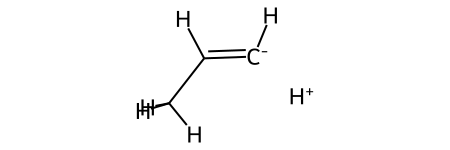

In [3]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
c3h6.mol

In [16]:
import py3Dmol
view = py3Dmol.view()
rc.Draw.IPythonConsole.drawMol3D(c3h6.mol, view=view)
view.setStyle({'stick': {'showNonBonded':True}})

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [34]:
for atom in c3h6.mol.GetAtoms():
    print(atom.GetIdx(), atom.GetAtomicNum(), len(atom.GetBonds()), atom.GetFormalCharge(), atom.GetExplicitValence())

0 6 3 0 4
1 6 2 -1 3
2 1 1 0 1
3 1 1 0 1
4 6 4 0 4
5 1 0 1 0
6 1 1 0 1
7 1 1 0 1
8 1 1 0 1


In [6]:
proton_idxs = []
carbanion_idxs = []
for i, atom in enumerate(c3h6.mol.GetAtoms()):
    n = atom.GetAtomicNum()
    v = atom.GetExplicitValence()
    if n == 1 and v == 0:
        proton_idxs.append(i)
    elif n == 6 and v < 4:
        carbanion_idxs.append(i)
if len(proton_idxs)>1 or len(carbanion_idxs)>1:
    NotImplemented("More than one proton or carbon")
assert len(proton_idxs) == 1
assert len(carbanion_idxs) == 1
molrw = rc.RWMol(c3h6.mol)
molrw.AddBond(proton_idxs[0], carbanion_idxs[0])
# for i in proton_idxs[0], carbanion_idxs[0]:
#     molrw.GetAtomWithIdx(i).SetFormalCharge(0)

8

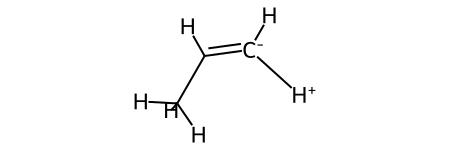

In [7]:
molrw

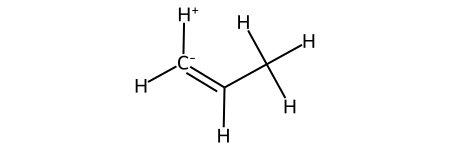

In [10]:
rc.AllChem.Compute2DCoords(molrw)
molrw

In [15]:
molrw.UpdatePropertyCache()

[23:31:12] Explicit valence for atom # 5 H, 2, is greater than permitted


AtomValenceException: Explicit valence for atom # 5 H, 2, is greater than permitted

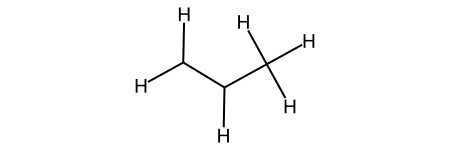

In [17]:
for i in proton_idxs[0], carbanion_idxs[0]:
    molrw.GetAtomWithIdx(i).SetFormalCharge(0)
molrw

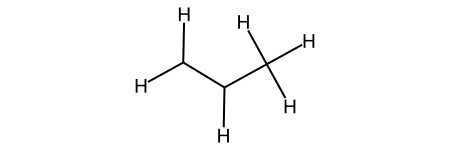

In [19]:
molrw.UpdatePropertyCache()
molrw

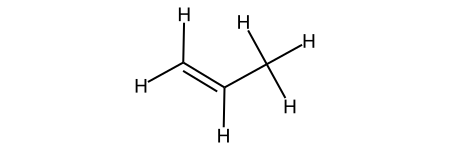

In [21]:
rc.rdDetermineBonds.DetermineBonds(molrw, charge=0)
molrw

In [13]:
dir(molrw)

['AddAtom',
 'AddBond',
 'AddConformer',
 'BeginBatchEdit',
 'ClearComputedProps',
 'ClearProp',
 'CommitBatchEdit',
 'Compute2DCoords',
 'ComputeGasteigerCharges',
 'Debug',
 'GetAromaticAtoms',
 'GetAtomWithIdx',
 'GetAtoms',
 'GetAtomsMatchingQuery',
 'GetBondBetweenAtoms',
 'GetBondWithIdx',
 'GetBonds',
 'GetBoolProp',
 'GetConformer',
 'GetConformers',
 'GetDoubleProp',
 'GetIntProp',
 'GetMol',
 'GetNumAtoms',
 'GetNumBonds',
 'GetNumConformers',
 'GetNumHeavyAtoms',
 'GetProp',
 'GetPropNames',
 'GetPropsAsDict',
 'GetRingInfo',
 'GetStereoGroups',
 'GetSubstructMatch',
 'GetSubstructMatches',
 'GetUnsignedProp',
 'HasProp',
 'HasQuery',
 'HasSubstructMatch',
 'InsertMol',
 'NeedsUpdatePropertyCache',
 'RemoveAllConformers',
 'RemoveAtom',
 'RemoveBond',
 'RemoveConformer',
 'ReplaceAtom',
 'ReplaceBond',
 'RollbackBatchEdit',
 'SetBoolProp',
 'SetDoubleProp',
 'SetIntProp',
 'SetProp',
 'SetStereoGroups',
 'SetUnsignedProp',
 'ToBinary',
 'UpdatePropertyCache',
 '__DebugMol',


In [12]:
rc.rdDetermineBonds.DetermineBonds(molrw, charge=0)
molrw

ValueError: Valence of atom 5 is 1, which is larger than the allowed maximum, 1

In [43]:
for atom in molrw.GetAtoms():
    print(atom.GetIdx(), atom.GetAtomicNum(), len(atom.GetBonds()), atom.GetFormalCharge(), atom.GetExplicitValence())

0 6 3 0 4
1 6 2 -1 3
2 1 1 0 1
3 1 1 0 1
4 6 4 0 4
5 1 0 1 0
6 1 1 0 1
7 1 1 0 1
8 1 1 0 1


In [29]:
dir(atom)

['ClearProp',
 'DescribeQuery',
 'GetAtomMapNum',
 'GetAtomicNum',
 'GetBonds',
 'GetBoolProp',
 'GetChiralTag',
 'GetDegree',
 'GetDoubleProp',
 'GetExplicitBitVectProp',
 'GetExplicitValence',
 'GetFormalCharge',
 'GetHybridization',
 'GetIdx',
 'GetImplicitValence',
 'GetIntProp',
 'GetIsAromatic',
 'GetIsotope',
 'GetMass',
 'GetMonomerInfo',
 'GetNeighbors',
 'GetNoImplicit',
 'GetNumExplicitHs',
 'GetNumImplicitHs',
 'GetNumRadicalElectrons',
 'GetOwningMol',
 'GetPDBResidueInfo',
 'GetProp',
 'GetPropNames',
 'GetPropsAsDict',
 'GetQueryType',
 'GetSmarts',
 'GetSymbol',
 'GetTotalDegree',
 'GetTotalNumHs',
 'GetTotalValence',
 'GetUnsignedProp',
 'HasOwningMol',
 'HasProp',
 'HasQuery',
 'HasValenceViolation',
 'InvertChirality',
 'IsInRing',
 'IsInRingSize',
 'Match',
 'NeedsUpdatePropertyCache',
 'SetAtomMapNum',
 'SetAtomicNum',
 'SetBoolProp',
 'SetChiralTag',
 'SetDoubleProp',
 'SetExplicitBitVectProp',
 'SetFormalCharge',
 'SetHybridization',
 'SetIntProp',
 'SetIsAromati

## Methylenimmonium

INFO:root:cached pops in 3.4030008299741894 s
INFO:root:cached inter_state in 0.35158085997682065 s
INFO:root:cached delta_E in 6.856008332921192 s
INFO:root:cached fosc_time in 6.494982497999445 s
INFO:root:finished plot_timeplots in 17.076345595996827 s
INFO:root:cached spectra in 0.46707572299055755 s
INFO:root:cached spectra_groups in 0.46933814499061555 s
INFO:root:finished plot_separated_spectra_and_hists in 3.8685671479906887 s
INFO:root:cached noodle in 0.5269116489216685 s
INFO:root:finished plot_nacs_histograms in 2.0998423759592697 s
INFO:root:finished plot_noodle in 5.1232288860483095 s
[19:09:03] WARNING: Proton(s) added/removed

INFO:root:finished plot_structure in 0.15516887803096324 s


C=[NH2+] InChI=1S/CH3N/c1-2/h2H,1H2/p+1


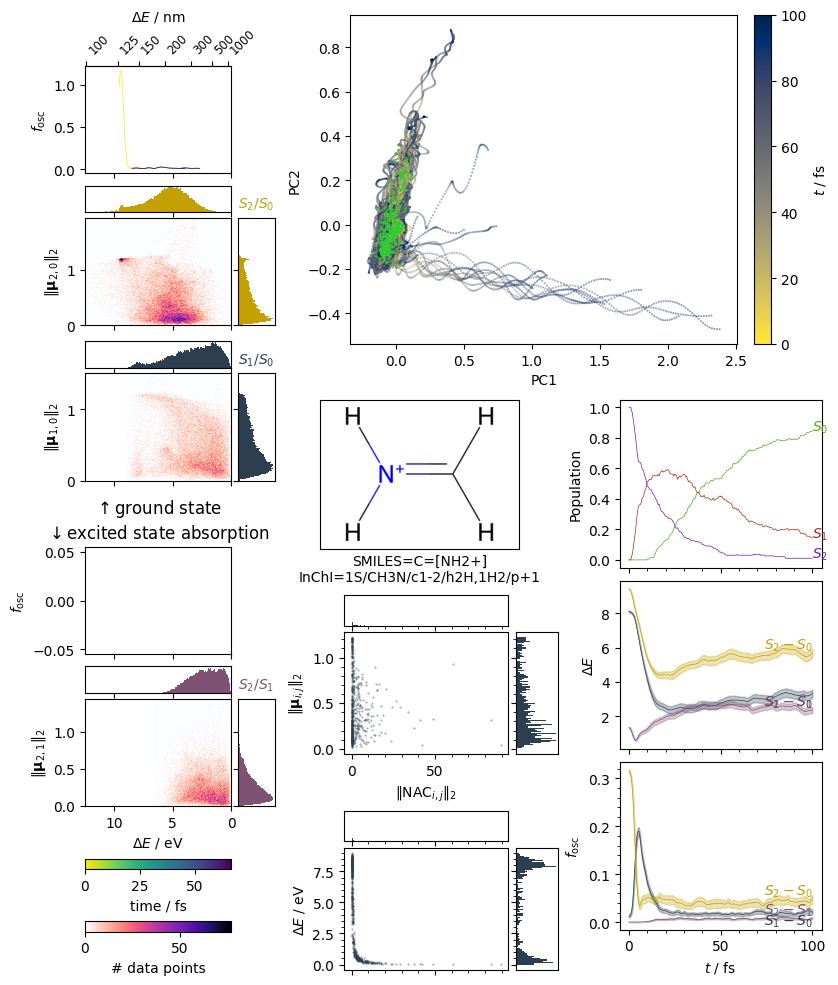

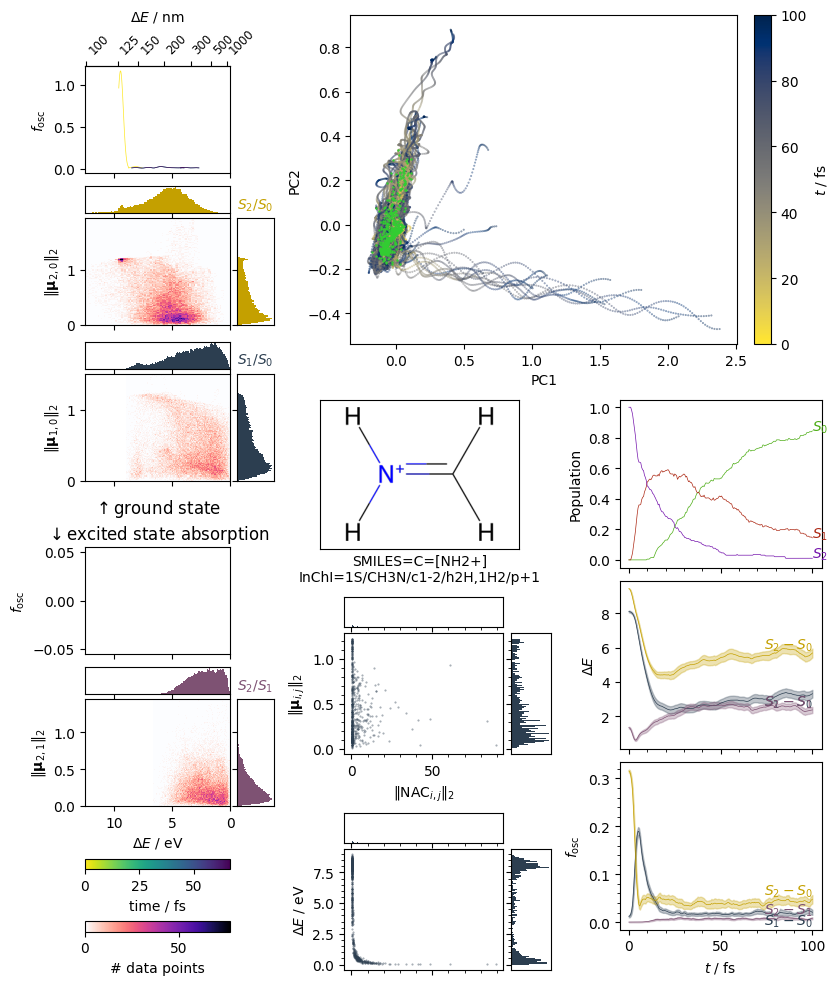

In [16]:
sheet = D.Datasheet(path='/nc/Theo_SHNITSEL/unfiltered/CH2NH2_time.nc')
sheet.charge = 1
sheet.plot()

In [6]:
import shnitsel.dynamic.xrhelpers as xh
ch2nh2 = xh.get_frames('/nc/Theo_SHNITSEL/unfiltered/CH2NH2.nc')
ch2nh2

<xarray.Dataset> Size: 57MB
Dimensions:     (frame: 39365, state: 3, state2: 3, direction: 3, statecomb: 3,
                 atom: 6)
Coordinates:
  * state       (state) int64 24B 1 2 3
  * state2      (state2) int64 24B 1 2 3
  * atom        (atom) int64 48B 0 1 2 3 4 5
  * direction   (direction) <U1 12B 'x' 'y' 'z'
    atNames     (atom) <U1 24B ...
  * frame       (frame) object 315kB MultiIndex
  * trajid      (frame) int64 315kB 205 205 205 205 205 ... 905 905 905 905 905
  * ts          (frame) int64 315kB 0 1 2 3 4 5 6 ... 195 196 197 198 199 200
  * statecomb   (statecomb) object 24B MultiIndex
  * from        (statecomb) int64 24B 1 1 2
  * to          (statecomb) int64 24B 2 3 3
Data variables:
    energies    (frame, state) float64 945kB 0.4639 8.808 9.802 ... 12.46 14.49
    dip_all     (frame, state, state2, direction) float64 9MB ...
    dip_perm    (frame, state, direction) float64 3MB ...
    dip_trans   (frame, statecomb, direction) float64 3MB ...
    sdiag       (frame) int64 315kB ...
    astate      (frame) int64 315kB ...
    forces      (frame, state, atom, direction) float64 17MB ...
    has_forces  (frame) bool 39kB ...
    phases      (frame, state) float64 945kB ...
    nacs        (frame, statecomb, atom, direction) float64 17MB ...
    atXYZ       (frame, atom, direction) float64 6MB ...
Attributes:
    max_ts:   200